# Project: Investigate Medical Appointment No Shows Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row

01 - PatientId : Identification of a patient 

02 - AppointmentID : Identification of each appointment

03 - Gender : Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - AppointmentDay : The day of the actuall appointment, when they have to visit the doctor.

05 - ScheduledDay : The day someone called or registered the appointment, this is before appointment of course.

06 - Age : How old is the patient.

07 - Neighbourhood : Where the appointment takes place.

08 - Scholarship : True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hipertension : True or False

10 - Diabetes : True or False

11 - Alcoholism : True or False

12 - Handcap : True or False

13 - SMS_received : 1 or more messages sent to the patient.

14 - No-show : True or False.

> questions to ask:

            1-Research Question 1 ( What is the Age distribution for show / no-show patients )
            2-Research Question 2 ( Does Age and Gender effect togther for show / no-show patients )
            3-Research Question 3 (is diabetes affect in patinent show or not? )
            4-Research Question 4(does watting time efect in showing or not )
            5-Research Question 5( Are there more shows on Appointment_Day of the week?)
            6-Research Question 6( Are there more shows on Scheduled_Day of the week?)




## Importing The libraries

In [40]:
#  Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.


## Importing The Data

In [41]:
# Load in the data with 'read_csv()'
df = pd.read_csv("noshowappointments-kagglev2-may-2016 (1).csv")

## General Properties &  Data Cleaning

In [42]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [43]:
df.shape

(110527, 14)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###### PatientId : is coming as float64. Since PatientId is a simple numeric so we can convert it into integer from float.

###### ScheduledDay : is coming as object. Since ScheduledDay is a date so we can convert it into datetime from object.

###### AppointmentDay : is coming as object. Since AppointmentDay is a date so we can convert it into datetime from object.

###### no-show : is equal to 'yes' if it didn't show and ' no' if it show. we wil rename it and make it integer


In [45]:
# to convert PatientId column from float to int
df['PatientId'] = df['PatientId'].astype('int64')

# to convert ScheduledDay column from object to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# to convert AppointmentDay column from object to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# rename no-show column 
df = df.rename(columns={'No-show':'Show'})
# convert no to 1 and yes to 0 
df.loc[ df['Show'] =='No' ,'Show'] = '1'
df.loc[ df['Show'] =='Yes' ,'Show'] = '0'
# convert No-show column from object to integer
df['Show'] = df['Show'].astype('int')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  Show          

In [47]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


>i have mentioned that :

         1- there is abnormal values in Age as min is equal to -1 
         2- there is abnormal values in Handcap as max is equal to 4
         3- the mean age of patients is 37
         4- the percentage of patients that show is 79.8 % 

##### we will see the abnormal values in age and deal with it 

In [48]:
# 1- see the rows with abnormal values
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [49]:
# delete this row with abnormal value: Age = -1 as we can't predict its age
# 1 row only will deleted
df.drop(index=99832, inplace=True)

In [50]:
# make sure we deleted it 
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show


##### we will see the abnormal values in Handcap and deal with it 

In [51]:
# 1- see the rows with abnormal values
df[df['Handcap']>1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
946,72825819926211,5582483,M,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,1
1665,12429193284112,5525497,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,1
1666,12429193284112,5525498,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,1
2071,12429193284112,5640120,M,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,1
2091,14918292313383,5638626,F,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,238721151823643,5756931,F,2016-06-01 08:48:28+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,1
109484,358949459162675,5752442,M,2016-05-31 11:45:57+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,1
109733,566297621534644,5772744,F,2016-06-03 16:11:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,1
109975,45221851115953,5766970,M,2016-06-02 16:07:36+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,1


In [52]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

##### Handcap column is reprsented in 4 categories maybe this means they have more than one handicap or maybe its a typo so we are going to delete them 


In [53]:
# delete rows with abnormal value: Handcap > 1 as we can't know if it typo or another category 
df.drop(index=df[df['Handcap']>1].index , inplace=True)

In [54]:
# make sure we deleted it 
df['Handcap'].value_counts()

0    108285
1      2042
Name: Handcap, dtype: int64

> we will make sure there's no dublicates

In [55]:
df.duplicated().sum()

0

In [56]:
df['PatientId'].duplicated().sum()

48137

> there is 48137 frequent patients

In [57]:
df['AppointmentID'].duplicated().sum()

0

> we will dig more in scheduled_day and appointment_day columns 

In [58]:
# make a new coulmn represent the number of days till the appointment
df['watting_days'] = (df.AppointmentDay - df.ScheduledDay).dt.days 
# make a new coulmns to represnt the day name of appointment day and scheduled day
df['Scheduled_Day']= df.ScheduledDay.dt.day_name()
df['Appointment_Day']= df.AppointmentDay.dt.day_name()


In [59]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,watting_days,Scheduled_Day,Appointment_Day
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,-1,Friday,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,-1,Friday,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,-1,Friday,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,-1,Friday,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,-1,Friday,Friday
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,1,1,Wednesday,Friday
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0,1,Wednesday,Friday
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,0,1,Wednesday,Friday
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,1,-1,Friday,Friday
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,1,1,Wednesday,Friday


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110327 non-null  int64              
 1   AppointmentID    110327 non-null  int64              
 2   Gender           110327 non-null  object             
 3   ScheduledDay     110327 non-null  datetime64[ns, UTC]
 4   AppointmentDay   110327 non-null  datetime64[ns, UTC]
 5   Age              110327 non-null  int64              
 6   Neighbourhood    110327 non-null  object             
 7   Scholarship      110327 non-null  int64              
 8   Hipertension     110327 non-null  int64              
 9   Diabetes         110327 non-null  int64              
 10  Alcoholism       110327 non-null  int64              
 11  Handcap          110327 non-null  int64              
 12  SMS_received     110327 non-null  int64              
 13 

> i have mentioned that :

    1- watting_days coulmn need to add 1 to each entry in it

      

In [61]:
# add 1 to each entry in watting_days column
df['watting_days'] = df['watting_days'] + 1

In [62]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,watting_days,Scheduled_Day,Appointment_Day
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Friday,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Friday,Friday


In [63]:
df.watting_days.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

> we don't need the AppointmentID coulmn so we are going to drop i t

In [64]:
df.drop('AppointmentID', inplace=True, axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110327 non-null  int64              
 1   Gender           110327 non-null  object             
 2   ScheduledDay     110327 non-null  datetime64[ns, UTC]
 3   AppointmentDay   110327 non-null  datetime64[ns, UTC]
 4   Age              110327 non-null  int64              
 5   Neighbourhood    110327 non-null  object             
 6   Scholarship      110327 non-null  int64              
 7   Hipertension     110327 non-null  int64              
 8   Diabetes         110327 non-null  int64              
 9   Alcoholism       110327 non-null  int64              
 10  Handcap          110327 non-null  int64              
 11  SMS_received     110327 non-null  int64              
 12  Show             110327 non-null  int32              
 13 

In [66]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,watting_days,Scheduled_Day,Appointment_Day
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,Friday
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday,Friday
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday,Friday
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Friday,Friday
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Friday,Friday


array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'ScheduledDay'}>,
        <AxesSubplot:title={'center':'AppointmentDay'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>,
        <AxesSubplot:title={'center':'Show'}>,
        <AxesSubplot:title={'center':'watting_days'}>]], dtype=object)

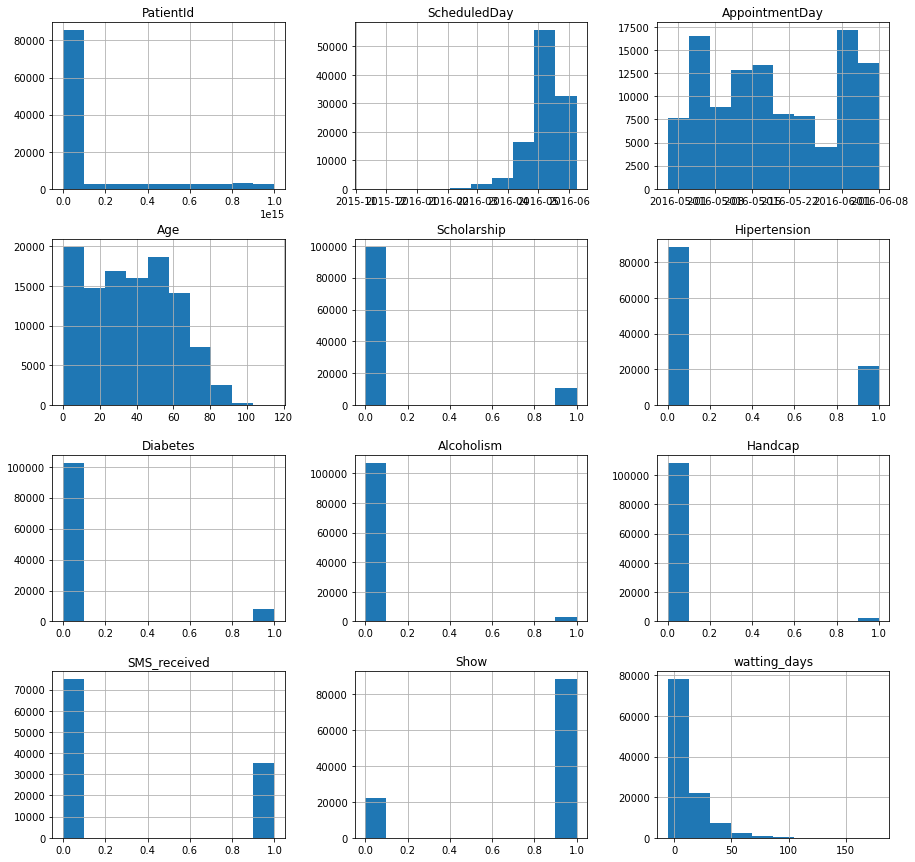

In [67]:
df.hist(figsize=(15,15))

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.




###### i couldn't find anything

## Research Question 1 ( What is the Age distribution for show / no-show patients )

> let’s investigate the age distribution of patients and try to glean some idea of how the age is related to whether they show or not 

<AxesSubplot:>

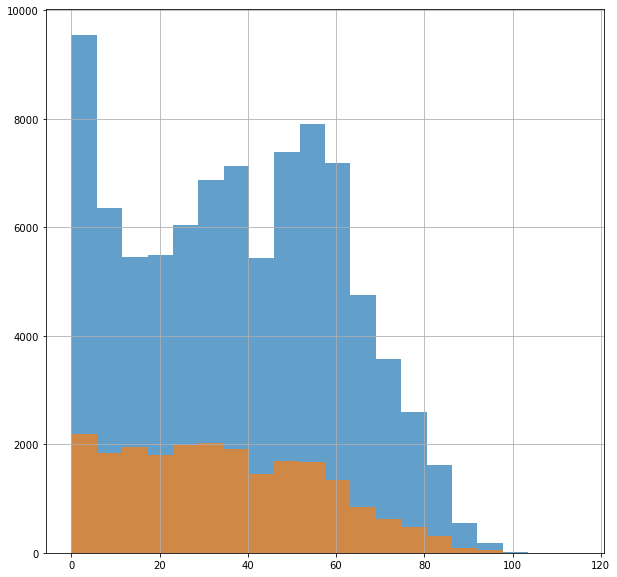

In [68]:
# plot age 
df.Age[df.Show==1].hist(bins=20, figsize=(10,10) , alpha=0.7)
df.Age[df.Show==0].hist(bins=20, figsize=(10,10) , alpha = 0.7)

C:\Users\syous\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\syous\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

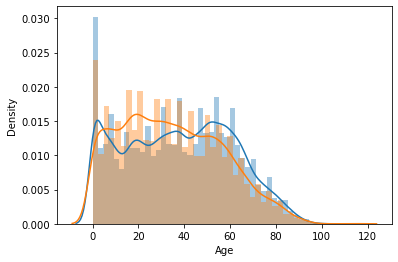

In [69]:
# We can use Seaborn’s distplot to get a better feel for the distribution
sns.distplot(df.Age[df.Show==1])
sns.distplot(df.Age[df.Show==0])


###### I can see that age from 0 to 10 they have a big probability of showing then from 10 to 50 they have less probability of showing but sill big then from 50 to 100 they have a big probability of showing then after 100 they don't show up

## Research Question 2 ( Does Age and Gender effect togther for show / no-show patients )

> let’s investigate the age and gender distribution of patients and try to glean some idea of how differences in showing or not for male and female patients and relate this to age 

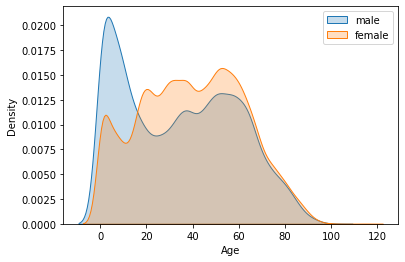

In [70]:
df2 = df[df.Show == 1] 
sns.kdeplot(df2[df2.Gender == 'M'].Age, shade=True, label='male')
sns.kdeplot(df2[df2.Gender == 'F'].Age, shade=True, label='female')

plt.legend()


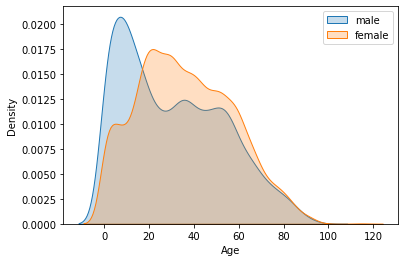

In [71]:
df2 = df[df.Show == 0]
sns.kdeplot(df2[df2.Gender == 'M'].Age, shade=True, label='male')
sns.kdeplot(df2[df2.Gender == 'F'].Age, shade=True, label='female')

plt.legend()

>we can see that age:

        1- from 0 to 15 males show more than female
        2- form 15 to 60 nearly the same in behaviour like females 
        3- from 60 to 100 females don't show more than men
        4 - up to 100 they don't show


### Research Question 3 (is diabetes affect in patinent show or not? )

In [72]:
x = df[df['Show']==1].Diabetes.value_counts()
y = df[df['Show']==0].Diabetes.value_counts()
x
y
print("percentege of people having diabtes and show",(x[0]/(x[0]+x[1]+y[0]+y[1]))*100)
print("percentege of people not having diabtes and show",(x[1]/(x[0]+x[1]+y[0]+y[1]))*100)
print("percentege of people having diabtes and don't show",(y[0]/(y[0]+y[1]+x[0]+x[1]))*100)
print("percentege of people not having diabtes and don't show",(y[1]/(y[0]+y[1]+x[0]+x[1]))*100)

percentege of people having diabtes and show 73.93566398071188
percentege of people not having diabtes and show 5.871636136213257
percentege of people having diabtes and don't show 18.903804145857315
percentege of people not having diabtes and don't show 1.2888957372175442


In [73]:
x = df[df['Show']==1].Diabetes.value_counts()
y = df[df['Show']==0].Diabetes.value_counts()
x
y
print("percentege of people having diabtes and show",(x[0]/(x[0]+x[1]))*100)
print("percentege of people not having diabtes and show",(x[1]/(x[0]+x[1]))*100)
print("percentege of people having diabtes and don't show",(y[0]/(y[0]+y[1]))*100)
print("percentege of people not having diabtes and don't show",(y[1]/(y[0]+y[1]))*100)

percentege of people having diabtes and show 92.64273302365729
percentege of people not having diabtes and show 7.357266976342718
percentege of people having diabtes and don't show 93.61702127659575
percentege of people not having diabtes and don't show 6.382978723404255


##### patients having diabtes have a better probability of showing than patients don't have diabetes 

## Research Question 4(does watting time efect in showing or not )

In [74]:
df.watting_days.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

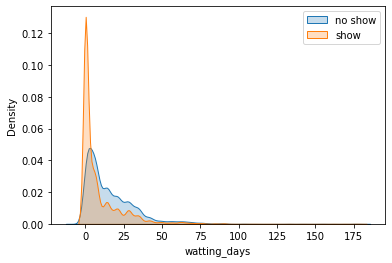

In [75]:
df2 = df[df.Show == 0]
sns.kdeplot(df2.watting_days, shade=True, label='no show')
df23 = df[df.Show == 1]
sns.kdeplot(df23.watting_days, shade=True, label='show')

plt.legend()

In [76]:
df.watting_days.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

##### patients have a big probability of showing if the watting days less than 15 are showing and after 15 days this probability reduces ascendingly

## Research Question 5( Are there more shows on Appointment_Day of the week?)


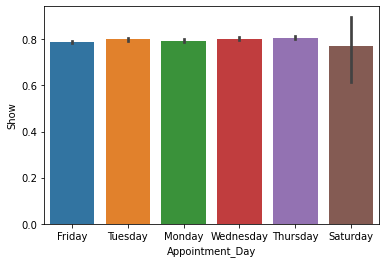

In [77]:
sns.barplot(x=df.Appointment_Day, y=df.Show)
plt.show()

##### the percentage of not showing  is much higher when the appointment day saturday than other days 

## Research Question 6( Are there more shows on Scheduled_Day of the week?)

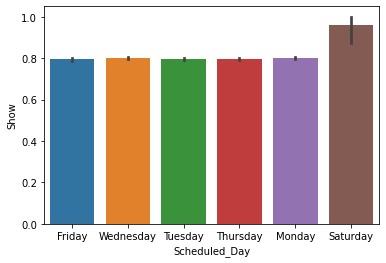

In [78]:
sns.barplot(x=df.Scheduled_Day, y=df.Show)
plt.show()

##### the percentage of showing is much higher when the scheduled day saturday than other days 

<a id='conclusions'></a>
## Conclusions

> Several characteristics were found to be connected to No Shows, according to the investigation. There was a difference in probability between patients who skipped their appointments and those who did not in every age group. Furthermore, certain scheduled days of the week were associated to a higher showing probability, while others were linked to a lower showing probability.